In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import seaborn as sns
import torch
import matplotlib.image as mpimg


In [17]:
with open('pose_pairs.json', 'rb') as f:
    pose_pair = json.load(f)

In [28]:
with open('dataset\processed_workout.json', 'rb') as f:
    int_data = json.load(f)

In [29]:
int_data

[{'img_path': 'workout/data/barbell biceps curl/barbell biceps curl_3500031.jpg',
  'pose_landmarks': [[0.4774287939071655, 0.24840272963047028],
   [0.5331271886825562, 0.4542478322982788],
   [0.45521247386932373, 0.45958471298217773],
   [0.4242556393146515, 0.7012475728988647],
   [0.321249783039093, 0.5739762783050537],
   [0.6110419631004333, 0.4489109516143799],
   [0.6341942548751831, 0.7340845465660095],
   [0.5563402771949768, 0.6042554378509521],
   [0.46739861369132996, 0.8921239376068115],
   [0.46117910742759705, 1.157341718673706],
   [0.4474429786205292, 1.457870364189148],
   [0.5698781609535217, 0.8972180485725403],
   [0.5868009924888611, 1.198378086090088],
   [0.5683548450469971, 1.4924317598342896],
   [0.47504422068595886, 0.21733975410461426],
   [0.47504422068595886, 0.21733975410461426],
   [0.48139142990112305, 0.22853988409042358],
   [0.5394233465194702, 0.236206516623497]],
  'pose_world_landmarks': [[-0.06522616744041443,
    -0.6757313013076782,
    -0.2

In [18]:
data = pose_pair[1]

In [19]:
data

{'img_path': 'workout/data/barbell biceps curl/barbell biceps curl_4900061.jpg',
 'pose': 'barbell biceps curl',
 'init_pose': [[0.5295660495758057, 0.176847904920578],
  [0.476034939289093, 0.32231405377388],
  [0.471698135137558, 0.32302969694137573],
  [0.4567622244358063, 0.5120503902435303],
  [0.4927700459957123, 0.5808890461921692],
  [0.48037177324295044, 0.3215984106063843],
  [0.46898242831230164, 0.49883875250816345],
  [0.5310307741165161, 0.6115987300872803],
  [0.471614807844162, 0.6528282761573792],
  [0.4791114032268524, 0.9225772619247437],
  [0.46552690863609314, 1.1621752977371216],
  [0.4721020460128784, 0.6513686180114746],
  [0.4755164384841919, 0.9086147546768188],
  [0.46486759185791016, 1.1486557722091675],
  [0.5176209807395935, 0.1582382619380951],
  [0.5176209807395935, 0.1582382619380951],
  [0.4958474040031433, 0.16688784956932068],
  [0.4972103536128998, 0.16570785641670227]],
 'corr_pose': [[[0.5107068863465116, 0.2177258750163325],
   [0.492969098965788

In [20]:
# data['img_path']

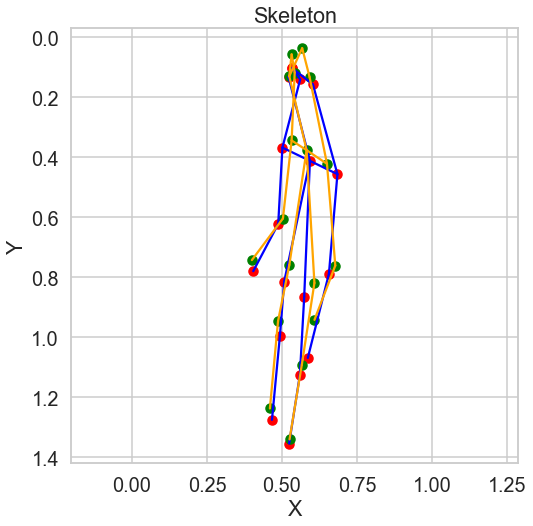

In [33]:
data = pose_pair[2]
# Keypoints set 1
keypoints_1 = np.array(data['init_pose']) # Replace with the coordinates of keypoints set 1

# Keypoints set 2
keypoints_2 = np.array(data['corr_pose'][0])  # Replace with the coordinates of keypoints set 2

# Edge index
edge_index = np.array([
    [1, 1, 2, 3, 5, 6, 1, 8, 9, 1, 11, 12, 1, 0, 14, 0, 15, 2, 5],
    [2, 5, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 0, 14, 16, 15, 17, 16, 17],
])

# Plotting the skeleton
plt.figure(figsize=(8, 8))
# img = mpimg.imread(data['img_path'])
# plt.imshow(img)
# Plot keypoints set 1
plt.scatter(keypoints_1[:, 0], keypoints_1[:, 1], color='red')
for i in range(edge_index.shape[1]):
    x = [keypoints_1[edge_index[0, i], 0], keypoints_1[edge_index[1, i], 0]]
    y = [keypoints_1[edge_index[0, i], 1], keypoints_1[edge_index[1, i], 1]]
    plt.plot(x, y, color='blue')

# Plot keypoints set 2
plt.scatter(keypoints_2[:, 0], keypoints_2[:, 1], color='green')
for i in range(edge_index.shape[1]):
    x = [keypoints_2[edge_index[0, i], 0], keypoints_2[edge_index[1, i], 0]]
    y = [keypoints_2[edge_index[0, i], 1], keypoints_2[edge_index[1, i], 1]]
    plt.plot(x, y, color='orange')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Skeleton')
plt.axis('equal')
# plt.legend()
plt.gca().invert_yaxis() 
plt.show()


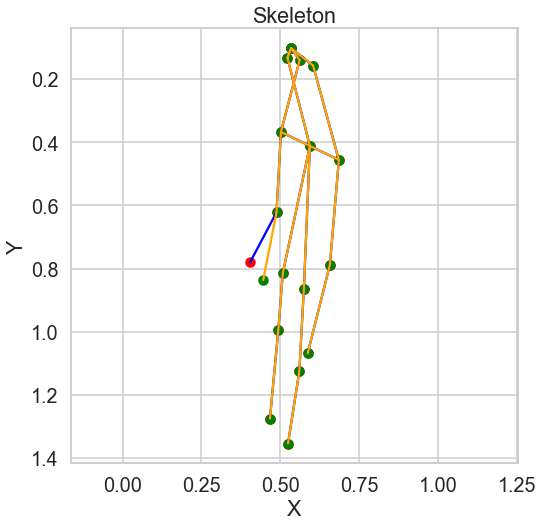

In [32]:
data1 = pose_pair[2]
data2 = int_data[2]
# Keypoints set 1
keypoints_1 = np.array(data1['init_pose']) # Replace with the coordinates of keypoints set 1

# Keypoints set 2
keypoints_2 = np.array(data2['pose_landmarks'])  # Replace with the coordinates of keypoints set 2

# Edge index
edge_index = np.array([
    [1, 1, 2, 3, 5, 6, 1, 8, 9, 1, 11, 12, 1, 0, 14, 0, 15, 2, 5],
    [2, 5, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 0, 14, 16, 15, 17, 16, 17],
])

# Plotting the skeleton
plt.figure(figsize=(8, 8))
# img = mpimg.imread(data['img_path'])
# plt.imshow(img)
# Plot keypoints set 1
plt.scatter(keypoints_1[:, 0], keypoints_1[:, 1], color='red')
for i in range(edge_index.shape[1]):
    x = [keypoints_1[edge_index[0, i], 0], keypoints_1[edge_index[1, i], 0]]
    y = [keypoints_1[edge_index[0, i], 1], keypoints_1[edge_index[1, i], 1]]
    plt.plot(x, y, color='blue')

# Plot keypoints set 2
plt.scatter(keypoints_2[:, 0], keypoints_2[:, 1], color='green')
for i in range(edge_index.shape[1]):
    x = [keypoints_2[edge_index[0, i], 0], keypoints_2[edge_index[1, i], 0]]
    y = [keypoints_2[edge_index[0, i], 1], keypoints_2[edge_index[1, i], 1]]
    plt.plot(x, y, color='orange')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Skeleton')
plt.axis('equal')
# plt.legend()
plt.gca().invert_yaxis() 
plt.show()


In [26]:
np.linalg.norm(keypoints_1 - keypoints_2, ord=1)

0.48608848797941734

In [7]:
with open('val_accuracy/workout/train_los_pred.json') as f:
    train_loss_pred = json.load(f)
with open('val_accuracy/workout/val_los_pred.json') as f:
    val_loss_pred = json.load(f)
with open('val_accuracy/workout/val_acc_pred.json') as f:
    val_acc_pred = json.load(f)
with open('val_accuracy/workout/train_los_cor.json') as f:
    train_loss_cor = json.load(f)
with open('val_accuracy/workout/val_los_cor.json') as f:
    val_loss_cor = json.load(f)
with open('val_accuracy/workout/val_acc_cor.json') as f:
    val_acc_cor = json.load(f)

In [8]:
max(val_acc_cor)

0.9563106796116505

In [9]:
len(train_loss_pred)

50

In [10]:
sns.set(style="whitegrid", font_scale=1.2, context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['mathtext.fontset'] = 'cm'

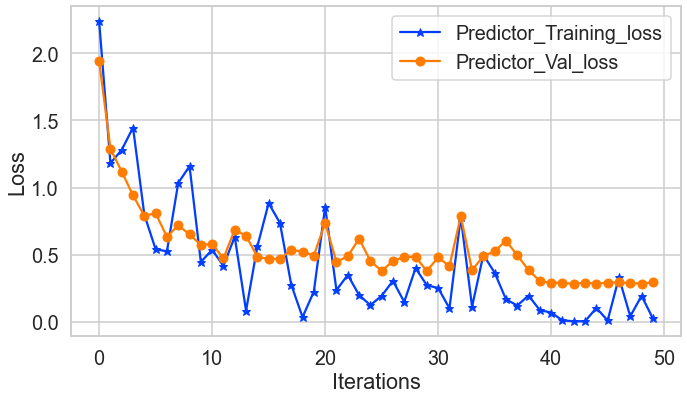

In [11]:
plt.figure(figsize=(10, 6))
t = range(len(train_loss_cor))
plt.plot(t, train_loss_pred,marker='*', label='Predictor_Training_loss')
plt.plot(t, val_loss_pred, label='Predictor_Val_loss', marker='o')
# plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

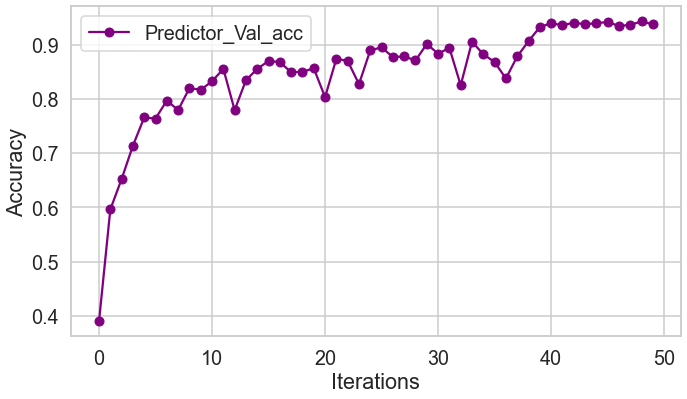

In [12]:
plt.figure(figsize=(10, 6))
t = range(len(train_loss_pred))
# plt.plot(t, train_loss_pred,marker='*', label='Predictor_Training_loss')
plt.plot(t, val_acc_pred, label='Predictor_Val_acc', marker='o', color='purple')
# plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

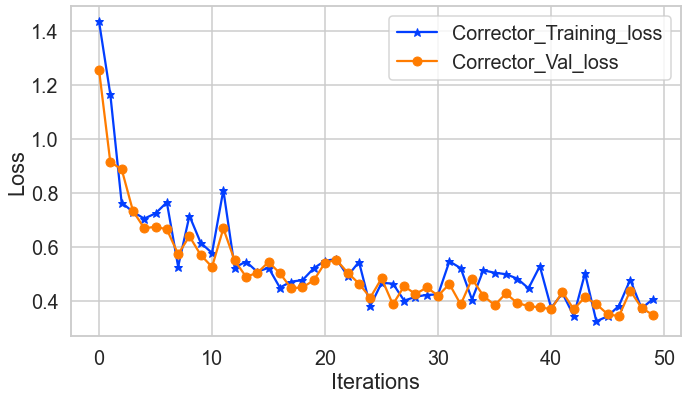

In [13]:
plt.figure(figsize=(10, 6))
t = range(len(train_loss_cor))
plt.plot(t, train_loss_cor,marker='*', label='Corrector_Training_loss')
plt.plot(t, val_loss_cor, label='Corrector_Val_loss', marker='o')
# plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

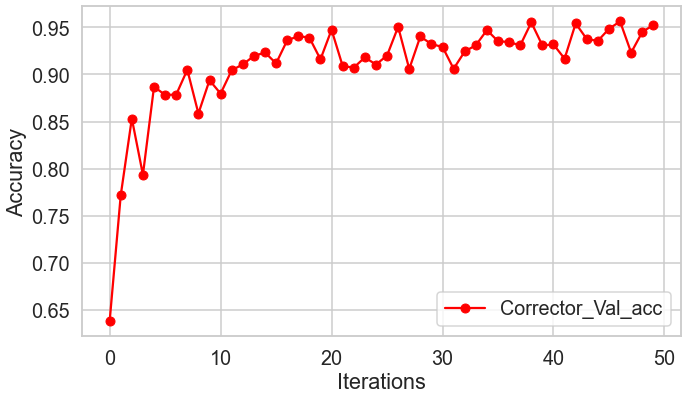

In [14]:
plt.figure(figsize=(10, 6))
t = range(len(train_loss_pred))
# plt.plot(t, train_loss_pred,marker='*', label='Predictor_Training_loss')
plt.plot(t, val_acc_cor, label='Corrector_Val_acc', marker='o', color='red')
# plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()